## 读取名为“yob1880.txt”文件，并将其列名设为name，sex，births。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
#按照性别分组，并计算每组生日的总和。
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

# 从数据集中读取1880-2011年间的数据并生成names这个DataFrame

In [4]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])
 
    # 为年份添加一列
    frame["year"] = year
    pieces.append(frame)
# 将所有内容连接到单个DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


# 绘制一个标题为Total births by sex and year的折线图

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

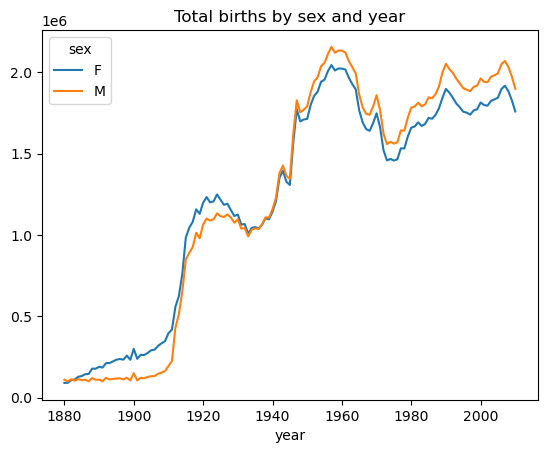

In [5]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

# 定义一个增加组的函数add_prop

In [6]:
def add_prop(group):
    #每个名字在出生年份和性别组中的比例，每个名字的出生率
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


# 计算对每组中的每个名字比例的总和

In [7]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

# 定义一个根据births进行降序排序的函数

In [8]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [9]:
#使用reset_index()函数对top1000 DataFrame 进行重置索引，并丢弃原始索引。
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


# 根据性别将top1000的值分为boys和girls两个数据集。并对births进行数据透视

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

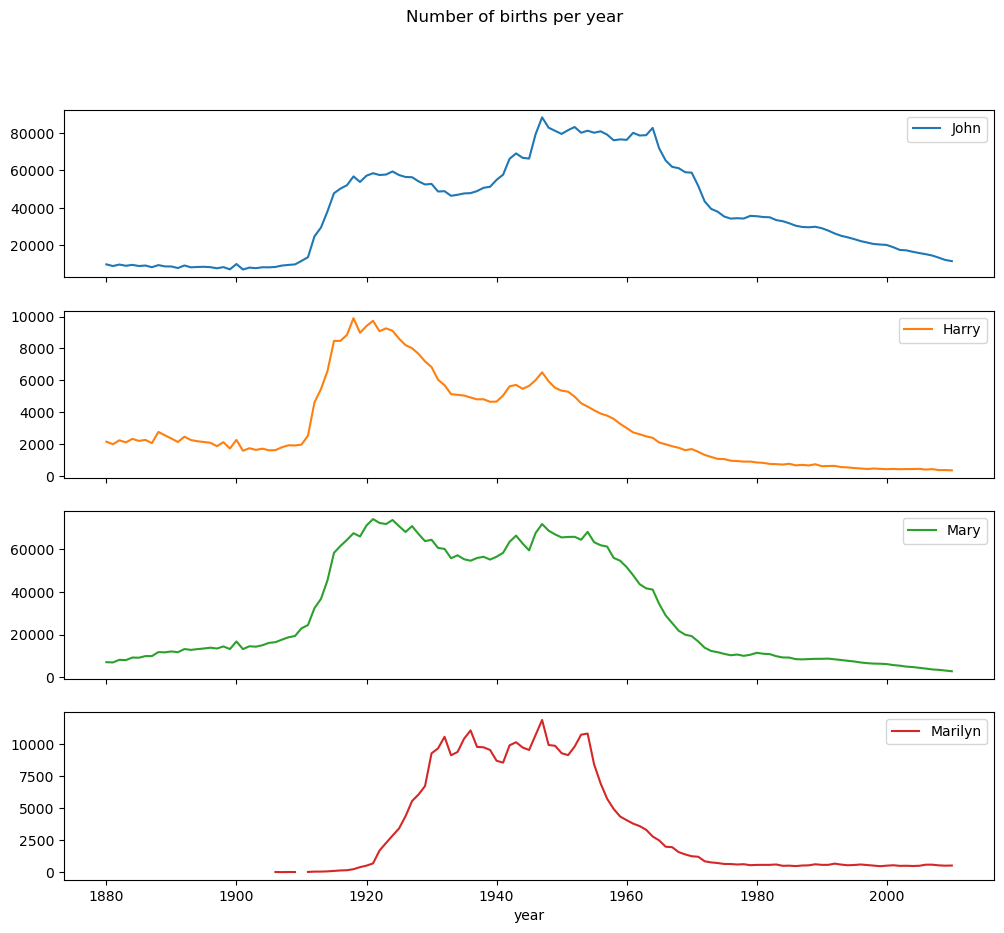

In [10]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

# 对prop进行数据透视图

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

<Figure size 640x480 with 0 Axes>

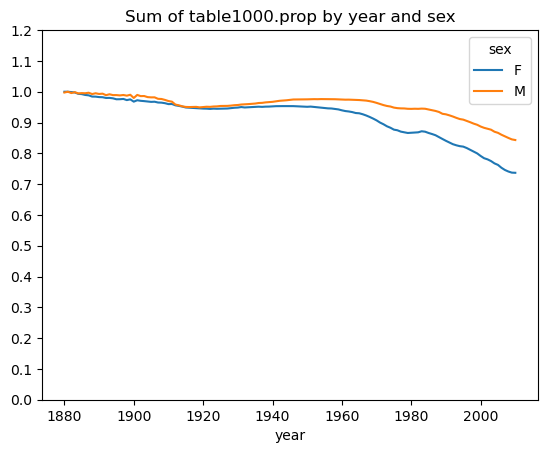

In [11]:
plt.figure()
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
#绘制标题为Sum of table1000.prop by year and sex的折线图
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

In [12]:
#2010年男孩出生人数表
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [13]:
# 对 'prop' 列的值进行降序排序，然后计算累积和
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
# 打印累积和的前10个值
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

116

In [14]:
#得到1900年男孩出生人数表
df = boys[boys.year == 1900]
#对表中prop值进行降序排序并计算累计和
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

# 定义一个get_quantile_count函数，对prop值进行降序排序并计算累计和

<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

<Figure size 640x480 with 0 Axes>

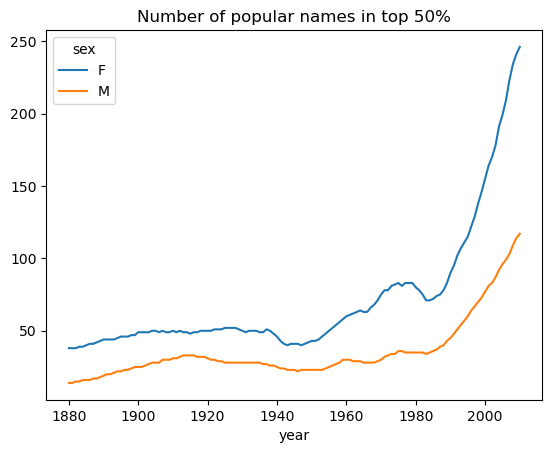

In [15]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
 
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()
fig = plt.figure()
diversity.head()
#根据年份和性别分组，并对每组应用get_quantile_count函数
#得到diversity这个新DataFrame，并绘制标题为Number of popular names in top 50%的折线图。
diversity.plot(title="Number of popular names in top 50%")

# 定义一个返回字符串最后一个字母的函数。

In [16]:
def get_last_letter(x):
    return x[-1]
 
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
 
table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [17]:
#展示每个年份和性别组合中每个名字的总和，以及占比
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

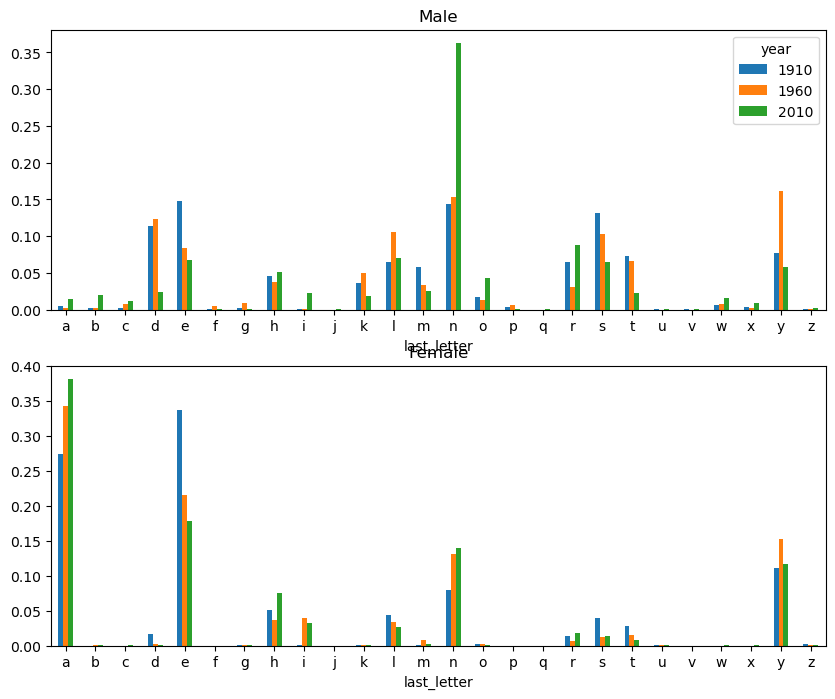

In [18]:
import matplotlib.pyplot as plt
#以男生和女生绘制两幅柱状图
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

# 统计最后男生中名字最后一个字母为d、n、y的比例

In [19]:
# 对 'table' DataFrame 的每一列进行求和，然后用 'table' DataFrame 的每个元素去除以对应列的和
# 结果是一个新的 DataFrame 'letter_prop'，其中的元素表示在同一列中的比例
letter_prop = table / table.sum() 
# 使用 .loc 方法从 'letter_prop' 中提取出索引为 "d", "n", "y" 和列名为 "M" 的部分
# .T 是转置操作，使得 "d", "n", "y" 成为列名，"M" 成为索引
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
# 使用 .head() 方法打印 'dny_ts' 的前五行数据
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


# 绘制其折线图

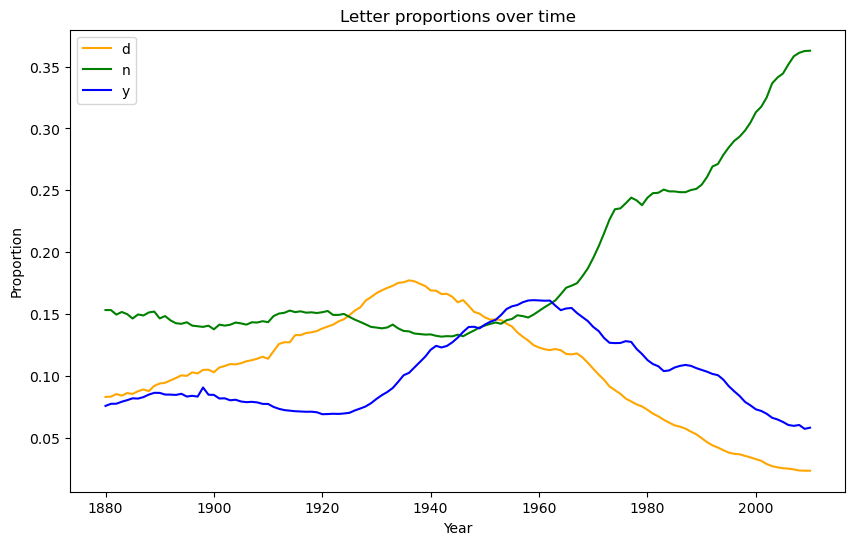

In [20]:
import matplotlib.pyplot as plt

# 绘制折线图
plt.figure(figsize=(10,6))
plt.plot(dny_ts.index, dny_ts['d'], label='d', color='orange')
plt.plot(dny_ts.index, dny_ts['n'], label='n', color='green')
plt.plot(dny_ts.index, dny_ts['y'], label='y', color='blue')

# 添加图例
plt.legend()

# 添加标题和坐标轴标签
plt.title('Letter proportions over time')
plt.xlabel('Year')
plt.ylabel('Proportion')

# 显示图形
plt.show()

In [21]:
#从top1000 DataFrame的"name"列获取唯一的姓名，将结果存储在all_names变量中
all_names = pd.Series(top1000["name"].unique())
#选择all_names中包含"Lesl"的姓名，并将结果赋值给lesley_like变量。
lesley_like = all_names[all_names.str.contains("Lesl")]
#显示lesley_like Series，即包含以"Lesl"开头的姓名。
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [22]:
#根据top1000 DataFrame中的"name"列与lesley_like中的姓名进行匹配，筛选出匹配的行数据，并将结果赋值给filtered变量
filtered = top1000[top1000["name"].isin(lesley_like)]
#对filtered DataFrame按姓名进行分组，计算每个姓名的出生人数总和,最后显示结果
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [23]:
#根据年份和性别对filtered进行透视，计算每个年份和性别的出生人数总和，并将结果存储在table变量中
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
#对table进行归一化，即每行的总和作为除数，计算每个年份和性别的归一化比例
table = table.div(table.sum(axis="columns"), axis="index")
#显示table归一化后最后几行的结果
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


# 绘制折线图，其中男生用实线，女生用虚线

<Axes: xlabel='year'>

<Figure size 640x480 with 0 Axes>

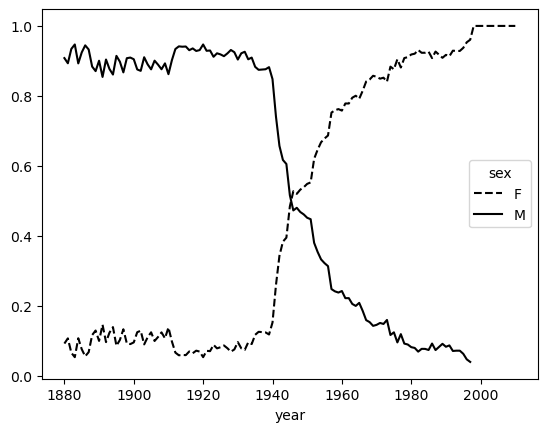

In [24]:
fig = plt.figure()
table.plot(style={"M": "k-", "F": "k--"})